# Functions

**Warning:** This lecture is a big pile of math. It's meant to get you in the groove with mathematical jargon, writing and thinking. 

If you have a hard time following the first time around, come back and practice! It's normal to feel confused when coming across new math. Take your time.

----

A function takes elements in one set and returns elements in another set (possibly the same one).To practice our math, let's go over the formal math definition of a function. Take your time as needed reading through this definition:

Let $A,B$ be sets, and let $F$ be a subset of $A × B$. We say that $F$ is a function if it satisfies the following property: for each $a ∈ A$, there is a unique pair $(a, b) ∈ F$ (an input must have exactly one output). To denote this, we use the arrow notation $F : A → B$. 

Remember that $A × B$ is the cartesian product between A and B as we saw before. We'll also often say that $F$ "maps" $A$ into $B$ (hence the arrow pointing from $A$ into $B$).

So the square function above can be written as the following map:

$$F = \{(1,1),(2,4),(3,9),(4,16),...\} = \{(x,x^2) : x ∈ \mathbb{N}\}$$

So we see thata function is a set of *input-output pairs*. The set $A$ is called the domain (AKA inputs or arguments) of $F$ and $B$ is called the range (outputs) of $F$.

The cleanest way to represent a function is with a map container, called the `Dict` in python:

In [ ]:
square_map = {
    1: 1,
    2: 4,
    3: 9,
    4: 16,
}

square_map[3]

9

This is often used to map elements in a dataset in one step:

In [ ]:
import pandas as pd

pd.Series([1,2,3,4]).map(square_map)

0     1
1     4
2     9
3    16
dtype: int64

**NOTE:** The term *map* is fairly ambiguous in mathematics and programming it can refer to:

- A function (a mapping)

- A dictionary object representing a mapping (a map object)

- Applying a function over a set of elements (like in the pandas code above, a map-application)

----

Functions often have to handle infinite numbers of input-output pairs. 

For example, the *square* function above should preferably work on all real numbers.

In fact, most interesting functions work on infinite sets, so pure functions are a basic construct in any programming language:

In [ ]:
# We can define a function with the `def` statement
def square(x):
  return x ** 2

# Let's make it a bit more explanatory:
def square(x: float) -> float:
  """Square a number"""
  return x ** 2

Note a few things going on here:

0) We give inline documentation with [docstrings](https://en.wikipedia.org/wiki/Docstring). This way we can look it up like other functions using `square?` in the notebook.

1) We specify the type of the input and output of the function. This is optional in python.

In [ ]:
# Type hints in functions are only HINTS
print(f"Oops, this isn't a float: {type(square(3))}")

# In other programming language you're forced to respect input and output types
# Python is good at being "math-like", but this is an area where it's loose
def square(x) -> float:
  if x < 5: return "banana" # This disregsards the type hint
  return x ** 2

Oops, this isn't a float: <class 'int'>


In [ ]:
# You can write code where functions return different things based on logic
# I'm not the police, I won't stop you.
# Just be aware it's not considered good code: it makes code hard to reason about
# One way to enforce types is with "defensive" or "contract" programming:
def square(x: float) -> float:
  """We INSIST on float input"""
  assert type(x) is float # crash if x not a float
  return x ** 2

square(3)

AssertionError: ignored

# Keyword Arguments

You can make functions with **keyword arguments** so you call them by name:

In [9]:
def my_pet(name="Jay", kind="dog"):
    print(f"I have a {kind} named {name}")

my_pet()
# You can re-order them in the function call
my_pet(kind='cat', name='Helios')

I have a dog named Jay
I have a cat named Helios


You see this very often in packages we use, like `pd.plot(kind='bar)`

# Relations

A **binary relation** is a function comparing two elements of one set and returning a boolean.

This is the most basic kind of function a type can have.

The normal relation is the "greater than or equal to $\ge$. A relation needs to have a few important propreties to give an **ordering** on a set: (Kolmogorov, pp. 20)

1) Reflexivity: $a \ge a$ for every $a \in M$  
2) Antisymmetry: If $a\ge b$ and $b \ge a$, then $a = b$  
3) Transitivity: If $a \ge b$ and $b \ge c$, then $a \ge c$  


If we have a set that's **ordered** then we can do **sorting** (which we'll see in detail later on!) and **partitioning** (splitting it into non-overlapping subsets) on a it.


In [ ]:
###Exercise: Math Drills

#(Kolmogorov, pp.9) Give an example of a binary relation on a set which is

#1. Reflexive and symmetric, but not transitive  
#2. Reflexive, but neither symmetric nor transitive  
#3. Symmetric, but neither reflexive nor transitive  
#4. Transitive, but neither reflexive nor symmetric  

## Example 1: Choices in economics

When studying economics in real life, we can't directly ask people for their preferences. Sometimes they lie to make themselves look good (everyone says they would prefer going to bed earlier!). Sometimes they don't know what they want until they're forced to make a choice (eg. my wife and choosing what restaurant to go).

So if we define a set of possible actions:

$$Actions = \{Go\ to\ bed,\ Watch\ TV,\ Go\ to\ bar\}$$

If we observe someone watching TV instead of going to bed, then we can assume for that individual, their [preference relation](https://en.wikipedia.org/wiki/Preference_(economics)) contains 

$$Go\ to\ bed \le Watch\ TV$$

All of modern economics math is built on this idea, if you're interested in more, a good (but difficult!) book is "Microeconomic Theory" by Mas-Collel, Whinston & Greene.

## Example 2: Ordinal numbers

It's possible to have a number system on which the $\ge$ operation is defined **but not** the $+$, $-$ or $*$ operations!

These are called [ordinal numbers](https://en.wikipedia.org/wiki/Ordinal_number), as opposed to [cardinal numbers](https://en.wikipedia.org/wiki/Cardinal_number) which are the ones supporting addition and friends.

A good example of ordinal numbers you see in everyday life is **review scores**. If you review an iPhone App 3 stars, then we know that you think it's better than an app you rated 2 stars. So $3stars \ge 2stars$.

However we still have

$$3stars + 2stars \neq 5stars$$

In general, a 4 star review is not "one bigger" than a 3 star review! We could argue that for most people, the gap between a 5 star and a 4 star review is much "bigger" than the gap between a 4 star and a 3 star review!


In [ ]:
### Exercise: Ordinal numbers!
# This is kind of a group creativity exercise
# We should end up discussing the merits and drawbacks to each methods

# Find a method to map a set [o1, o2, ... on] of ordinal numbers (eg. movie reviews)
# Into one Ordinal number
# eg. f(O^r) --> O^1

# Do the same as above, but mapping it into a real number

# Do the same as above, but mapping it into a boolean

One takewaway here is that the typical review aggregation score in the app stores (the average of the stars) makes no sense! If $+$ is not defined then the average:

$$  1/|N| \sum^N_{i \in N} i$$

Can't be defined. People are capable of using this terrible review aggregation method by building heuristics over the result (eg. 4.7+ -> very good).

**Factoring: ** We could redefine the 5 star system to any other 5 numbers (1, 10, 100, 1000, 10,000 stars) and the review score would be the same, because the actual labels we put on ordinal numbers don't matter. In the end all that matters is 

$$smallest \le second\ smallest \le ... \le biggest$$

So the App store review score would give the same result regardless as long as there are 5 options. 

However, the Rotten Tomatoes method (objective) or metacritic method (subjective) are better choices generally.

# Function Composition

Almost all functions can be made compositions of elementary functions ($+, -, \ge$). 

For instance, multiplication is repeated addition:

In [ ]:
def multiply(x, y):
  res = 0
  for i in range(y):
    res += x
  return res

multiply(12, 15)

180

This is pretty cumbersome, though. For instance if you wanted to do:

$$-4 * 15$$

you would need to decompose it as:

$$-1 * 4 * 15$$

(lets not get get bogged down by how to make this logic [compatible with real numbers](https://en.wikipedia.org/wiki/Construction_of_the_real_numbers#Construction_from_Cauchy_sequences))

We can define exponentiation the same way:

In [ ]:
def power(x, y):
  res = 1
  for i in range(y):
    res *= x
  return res

power(2, 16)

65536

**Exercise:**

Create division by the same method. Find a way to deal with remainders for fractional parts!

In [ ]:
### FIXME FIXME
def div(x, y):
  res = 0
  for i in range(y):
    res -= x
  return res

div(12, 15)

**Exercise 2:** Raising to a negative power is equivalent to the inverse of the result. So we have:

$$2^{-3} = 1/(2^3)$$

Fix the `power` function above to make it work

In [1]:
## FIXME FIXME
def power(x, y):
  res = 1
  for i in range(y):
    res *= x
  return res

power(2, 16)

65536

Decomposing complex functions into simpler parts make analyzing them easier. This will come in later on when we talk about derivatives and gradients.

Also, generally, it's a good idea to try to break down complex problems into simpler subproblems that are manageable.

### Polynomials

One type of function that's used and studied a lot is [polynomials](https://en.wikipedia.org/wiki/Polynomial). These are functions of the form:

$$F(x) = a_1 + a_2x + a_3 x^2 + ... + a_nx^n$$

Note the first term is $a_1x^0 = a_1$ because $x^0 = 1$ (why?).

Polynomials are powerful especially for making models. Couple of facts about polynomials:

- You can approximate [any continuous function](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem) with a polynomial. We'll go over this in the lecture on optimization & derivatives.

- Finding the values of $x$ where $F(x) = 0$ is called "solving" the equation and is going to be very important later on. This is because if you find where it's equal to 0, you can just "shift" the result up ro down to analyze where it's equal to any particular number.

For now we'll just note polynomials exist as a mathematical object and come back to them later.

# Functions as first-class objects

For computers, a function is just another piece of data (we'll cover this in a further lecture). For instance, you can point a python variable to be equal to a function:

In [5]:
def square(x):
  return x ** 2

y = square

y(9)


81

This means you can pass a function into another function:

In [6]:
def apply_n_times(x, f, n):
  return sum([f(x) for _ in range(n)])

apply_n_times(3, square, 2)

18

# Lambdas

One compact representation of functions is called the [lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions). It's a one line representation of a function and the basic idea of [lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus), a model of computers where function are the base of everything.

In [7]:
# Syntax: left hand side is arguments, right hand side is return statement
y = lambda x : x**2

print(y(9))

apply_n_times(3, lambda x : x**3, 2)

81


54

**NOTE:** Lambdas are made to easily pass functions into other functions. If you want to use more complex lambdas, you should probably define a function instead.

# Continuous Function

A function is called **continuous** if it fits the following mathematical proprety:

$$continuous function definition$$

In english this means that 

Clearly continuous functions can only be defined if the input and output is in term of real numbers:

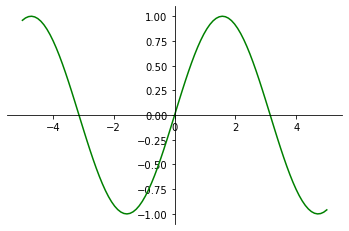

In [2]:
# plot sin(x)
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = np.sin(x)

# setting the axes at the centre
def make_fig():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    return fig, ax

fig, ax = make_fig()

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

On the other hand, any function in terms of integers will have "jumps" or "kinks" which break the continuity

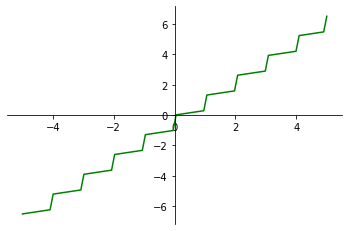

In [21]:
# Lazy trick: def fn and call on one line
y = ( lambda a : 0.3 * a + np.floor(a) )(x)

# plot the function
fig, ax = make_fig()
plt.plot(x,y, 'g')

Here, continuity is broken at the kinks in the function.

Continuous functions have a lot of nice propreties. Here are a few:

### Derivatives

Derivatives, integrals and gradients are only defined on continuous functions. We'll get to those later in the course

### Intermediate Value Theorem

If a continuous function outputs $y_1$ and $y_2$ then it can output all values between $y_1$ and $y_2$ (they're "linked" by the continuity)

### Extreme Value Theorem

Suppose that $f$ is a function which is continuous on the closed interval $[a, b]$. Then there exist real numbers $c$ and $d$ in $[a, b]$ such that

- $f$ has a maximum value at $x = c$ and
- $f$ has a minimum value at $x = d$. 

### Continuous Function composition

- The sum, difference, and product of two continuous functions are each continuous functions. 

    - All polynomial functions are continuous. (They're sums of continuous functions)

- The quotient of two continuous functions is continuous where it is defined. (It won't be defined when the denominator is zero.) 

- The composition of two continuous functions is continuous. 

    - This implies composition of $n$ continuous functions is continuous

So, for example, the square root function is continuous, so the square root of a continuous function is another continuous function.

- Functions inverse to continuous functions are continuous. 

# Function Inverses

The **inverse** of a function is a functions that reverses what it does and produces the input from it's output. For instance, a function $g(x)$ is the inverse of a function $f(x)$ if:

$$g(f(x)) = x$$

We generally call the inverse of $f(x)$ as $f^{-1}(x)$. We say this because:

$$ 1/x = x^{-1} $$

### Some important inverses:

- The `log` is the inverse of the exponent `exp`. This implies that $ln(e^x) = x$

Because exponentiation is repeated multiplication, $log$ reverses it so if:

$$f(x) = g(x) / h(x)$$

then:

$$ln(f(x)) = ln(g(x) / h(x)) = ln(g(x)) - ln(h(x))$$

The $log$ "reversed" the divisions into substractions (it also reverses multiplications into additions).

- Division is the inverse of multiplication. So $x \cdot (1/x) = 1$

# Fixed Points

A **Fixed Point** in a function is a value where $f(x) = x$. So if you iterate the function $f(f(f(...f(x)))) = x$

All points on the f(x) = x line are fixed points

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Fixed_point_example.svg/1024px-Fixed_point_example.svg.png)

In [11]:
f = lambda x : 4 - 3 * x + x ** 2

x = 2
print(f(x))
print(f(f(x)))
print(f(f(f(x))))
print(f(f(f(f(x)))))
print(f(f(f(f(f((x)))))))

2
2
2
2
2


### Attractor

A fixed point is said to be an attractor if the sequence

$$x, f(x), f(f(x)), ..., f^n(x)$$

converges to some fixed value

In [16]:
import numpy as np

f = lambda x : np.cos(x)

x = 2
for i in range(10):
    x = f(x)
    print(x)

-0.4161468365471424
0.9146533258523714
0.6100652997429745
0.8196106080000904
0.6825058578960018
0.7759946131215992
0.7137247340083882
0.7559287135747029
0.7276347923146813
0.7467496017309729


A last example would be where `""` is a fixed point in `lambda x : x[:-1]`